In [1]:
import pandas as pd
import numpy as np
import random
import pyttsx3
import ipywidgets as widgets
import csv
import numpy as np
import math as math
import statistics
from random import randrange
import re

In [2]:
randrange(10)

5

In [3]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = randrange(10)*10
        y = int(10*np.random.normal(rho * x, math.sqrt(rho+rho**3), 1))/10
        z = (0.1*x + 0.1*y)/10
        mat[i, ] = [x,y,z]
    return(mat)

In [4]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = np.random.normal(rho * y, math.sqrt(rho+rho**3), 1)
        y = np.random.normal(rho * x, math.sqrt(rho+rho**3), 1)
        z = np.random.normal(rho * x + rho * y, math.sqrt(rho+rho**3), 1)/100
        mat[i, ] = [x,y,z]
    return(mat)

In [5]:
save = pd.DataFrame(collapsedgibbs3NormV(100,0.99,50,45,1))

In [6]:
save[2]

0     1.000000
1     0.849462
2     0.771248
3     0.752258
4     0.759609
        ...   
95   -0.084810
96   -0.157119
97   -0.143876
98   -0.108846
99   -0.090928
Name: 2, Length: 100, dtype: float64

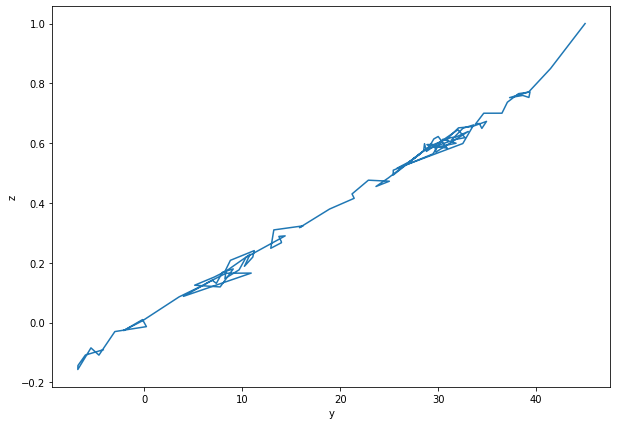

In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("y")
plt.ylabel("z")
plt.plot(save[1],save[2])
plt.savefig('yz.png')

In [8]:
save = open("lyricsdata.csv")

In [9]:
csvreader = csv.reader(save)

In [10]:
header = []
header = next(csvreader)

In [11]:
df = pd.DataFrame(index=np.arange(8031), columns=np.arange(1))

In [12]:
rows = []
for row in csvreader:
        rows.append(row)

In [13]:
engine = pyttsx3.init()

In [14]:
rate = engine.getProperty("rate")

In [15]:
voices = engine.getProperty("voices")
# bpm and subdivide bpm. in each line the bpm can differ across time.

In [16]:
engine.setProperty("voice", voices[7].id)

In [17]:
#engine = pyttsx3.init()
#engine.say('The quick brown fox jumped over the lazy dog.', 'fox')
#engine.runAndWait();
#engine.startLoop(False)
# engine.iterate() must be called inside externalLoop()
#def externalLoop():
#    for i in range(1, 3):
#            engine = pyttsx3.init()
#            rows[i][0] = rows[i][0][1:]
#            str1 = ''.join(rows[i])  
#externalLoop()
#engine.endLoop()

In [18]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.99, x = 50, y = 45, z = 0):
    # collapsed gibbs sampler version
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[y].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        print(sample)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            if(abs(sample[i-startingPoint,0]) >= 20 and abs(sample[i-startingPoint,0]) <= 1000 and abs(sample[i-startingPoint,0]) != 0):
                engine.setProperty("rate", abs(sample[i-startingPoint,0]))
            else:
                engine.setProperty("rate", 50)
            engine.setProperty("voice", voices[7].id)
            if(abs(sample[i-startingPoint,2]) <= 1):
                engine.setProperty("volume", sample[i-startingPoint,2])

            else:
                engine.setProperty("volume", 0.5)
            print(rows[i])
            engine.say(str1)
            engine.save_to_file(str1, 'rapsample.mp3')
            engine.runAndWait(); 
            engine.stop()

In [22]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.99, x = 50, y = 45, z = 0):
    # 1/4 version
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[7].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        print(sample)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            length = len(str1)
            str1 = str1.replace("(", "")
            str1 = str1.replace("(", "")
            str1 = re.split('\s+', str1)
            engine.setProperty("rate", randrange(150,200))
            rate = engine.getProperty("rate")
            if(engine.getProperty("rate") > 175):
                str2 = str(str1[0:len(str1)])
                str2 = str2.replace(",", "")
                engine.say(str2)
                engine.runAndWait();
                engine.stop()
            else:
                engine.setProperty("voice", voices[7].id)
                str3 = str(str1[0:int(len(str1)/4)])
                str3 = str3.replace(",","")
                engine.say(str3)
                engine.setProperty("rate", rate/4)
                str4 = str(str1[(int(len(str1)/4)):int(len(str1)/2)])
                str4 = str4.replace(",", "")
                engine.say(str4)
                engine.setProperty("rate", (5/4)*rate)
                str5 = str(str1[(int(len(str1)/2)):int(3*len(str1)/4)])
                str5 = str5.replace(",","")
                engine.say(str5)
                engine.setProperty("rate", (7/4)*rate)
                str6 = str(str1[(int(3*len(str1)/4)):len(str1)])
                str6 = str6.replace(",","")
                engine.say(str6)
                engine.runAndWait(); 
                engine.stop() 
            print(str1)

In [20]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.99, x = 50, y = 45, z = 0):
    # 1/3 version
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[7].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        print(sample)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            str1 = str1.replace("(", "")
            str1 = re.split('\s+', str1)
            engine.setProperty("rate", randrange(150,250))
            if(engine.getProperty("rate") > 200):
                str2 = str(str1[0:len(str1)])
                str2 = str2.replace(",","")
                engine.say(str2)
                engine.runAndWait();
                engine.stop()
            else:
                rate = engine.getProperty("rate")
                str2 = str(str1[0:int(len(str1)/3)])
                str2 = str2.replace(",", "")
                engine.say(str2)
                engine.setProperty("rate", rate/randrange(2,4)+10)
                engine.setProperty("volume", z-0.09)
                str3 = str(str1[(int(len(str1)/3)):int(2*len(str1)/3)])
                str3 = str3.replace(",", "")
                engine.say(str3)
                engine.setProperty("rate", (3/2)*rate)
                engine.setProperty("volume", z+0.2)
                str4 = str(str1[(int(2*len(str1)/3)):int(len(str1))])
                str4 = str4.replace(",","")
                engine.say(str4)
                engine.runAndWait(); 
                engine.stop() 
                print(rows[i])

In [57]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.99, x = 50, y = 45, z = 0):
    # 1/2 version
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[7].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            str1 = str1.replace("(", "")
            str1 = re.split('\s+', str1)
            engine.setProperty("rate", randrange(170,200))
            rate = engine.getProperty("rate")
            if(rate > 185):
                str2 = str(str1)
                str2 = str2.replace(",","")
                engine.say(str2)
                engine.runAndWait();
                engine.stop()
                print(str2)
            else:
                str2 = str(str1[0:int(len(str1)/2)])
                str2 = str2.replace(",", "")
                engine.say(str2)
                engine.setProperty("rate", (5/4)*rate)
                engine.setProperty("volume", z+0.15)
                str3 = str(str1[(int(len(str1)/2)):len(str1)])
                str3 = str3.replace(",","")
                engine.say(str3)
                engine.runAndWait();
                engine.stop()
                print(str3)

In [60]:
widgets.interact(text_to_speech, numberOfLines = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                 startingPoint = (1,8020,1), rho =(-0.99,0.99,0.01), x= (-900, 900, 10), y = (-47,47,1), z = (-1,1,0.1));





interactive(children=(Dropdown(description='numberOfLines', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…

In [21]:
rows[1][0] = rows[1][0][1:]
str1 = ''.join(rows[1])
str1 = str1.replace("(", "")
str1 = re.split('\s+', str1)

In [28]:
engine

In [35]:
engine.setProperty("rate", 170)
engine.say("hi" "hello")
engine.runAndWait()
engine.stop()

In [22]:
save = str(str1[0:int(len(str1)/2)])

In [23]:
save

'[\'"Now"\', \'"let"\', \'"me"\', \'"welcome"\', \'"everybody"\']'

In [24]:
save = save.replace(",","")

In [25]:
save

'[\'"Now"\' \'"let"\' \'"me"\' \'"welcome"\' \'"everybody"\']'

In [59]:
engine.endLoop()

In [26]:
engine.say(save)
engine.runAndWait()
engine.stop()

In [109]:
str2 = str(str1)

In [110]:
str2

'[\'"Now"\', \'"let"\', \'"me"\', \'"welcome"\', \'"everybody"\', \'"to"\', \'"the"\', \'"wild"\', \'"wild"\', \'"west."\', \'".")\']'

In [111]:
str2 = str2.replace(",", "")

In [112]:
str2

'[\'"Now"\' \'"let"\' \'"me"\' \'"welcome"\' \'"everybody"\' \'"to"\' \'"the"\' \'"wild"\' \'"wild"\' \'"west."\' \'".")\']'

In [81]:
str1 = str1.replace("(", "")

In [82]:
str1

'"Now" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [27]:
 str1.replace("'", "")

'("Now" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [56]:
str1 = str1.replace(",","")

In [57]:
str1

'ow" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [52]:
str1 = re.split('\s+', str1)

In [53]:
str1

['Now"',
 '"let"',
 '"me"',
 '"welcome"',
 '"everybody"',
 '"to"',
 '"the"',
 '"wild"',
 '"wild"',
 '"west."',
 '".")']

In [51]:
str1

'Now" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [30]:
str1 = re.split('\s+', str1)

In [32]:
str2 = str(str1)

In [33]:
str2

'[\'"Now"\', \'"let"\', \'"me"\', \'"welcome"\', \'"everybody"\', \'"to"\', \'"the"\', \'"wild"\', \'"wild"\', \'"west."\', \'".")\']'

In [38]:
str3 = str2.replace("\\","")

In [41]:
engine.say(str3)
engine.runAndWait()
engine.stop()

In [45]:
str3 = str2.replace(",","")

In [46]:
str3

'[\'"Now"\' \'"let"\' \'"me"\' \'"welcome"\' \'"everybody"\' \'"to"\' \'"the"\' \'"wild"\' \'"wild"\' \'"west."\' \'".")\']'

In [125]:
engine.stop()

In [47]:
str1[2]

'N'

In [24]:
engine.say(str(str1[0:int(len(str1)/2)]))
engine.runAndWait();
engine.stop()

In [25]:
str(str1[0:int(len(str1)/2)])

'[\'("Now"\', \'"let"\', \'"me"\', \'"welcome"\', \'"everybody"\']'

In [28]:
engine.say(str1)
engine.runAndWait();
engine.stop()

In [29]:
str1

'"Now" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [30]:
str1[2]

'N'

In [39]:
import re
re.split('\s+', 'Please split this string')

['Please', 'split', 'this', 'string']

In [48]:
str1 = re.split('\s+', str1)

In [52]:
str1[0]

'("Now"'

In [66]:
engine.say(str(str1[0:2]))
engine.runAndWait()

In [54]:
str1 = ''.join(str1)

In [57]:
str1[2]

'N'

In [28]:
str1

'("Now" "let" "me" "welcome" "everybody" "to" "the" "wild" "wild" "west." ".")'

In [28]:
engine.setProperty("rate", 180)
engine.say("Mom's" "spa" "gheh" "tee")
engine.say("there's" "vomit" "on" "his" "sweater" "already")
engine.setProperty("rate", 150)
engine.say("you" "know" "what" "I" "am" "saying")
engine.runAndWait(); 

In [49]:
rows[1][0:3]

['c("Now"', ' "let"', ' "me"']

In [22]:
randrange(100,200)

156

In [8]:
from gtts import gTTS
import os

tts = gTTS(text='what to say', lang='en')
tts.save('file.mp3')
from pygame import mixer  # Load the popular external library

mixer.init()
mixer.music.load('file.mp3')
mixer.music.play()

pygame 2.1.2 (SDL 2.0.18, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [26]:
# if needed:
engine.endLoop()

In [32]:
# pip install pyaudio
# below is improv based on my own voice

In [24]:
import re
import wave
import pyaudio
import _thread
import time

class TextToSpeech:
    
    CHUNK = 1024
    def __init__(self, words_pron_dict:str = 'cmudict-0.7b.txt'):
        self._l = {}
        self._load_words(words_pron_dict)

    def _load_words(self, words_pron_dict:str):
        with open(words_pron_dict, 'r') as file:
            for line in file:
                 if not line.startswith(';;;'):
                        key, val = line.split('  ',2)
                        self._l[key] = re.findall(r"[A-Z]+",val)

    def get_pronunciation(self, str_input):
        list_pron = []
        for word in re.findall(r"[\w']+",str_input.upper()):
            if word in self._l:
                list_pron += self._l[word]
        print(list_pron)
        delay=0
        for pron in list_pron:
            _thread.start_new_thread( TextToSpeech._play_audio, (pron,delay,))
            delay += 0.31

    def _play_audio(sound, delay):
        try:
            time.sleep(delay)
            wf = wave.open("sounds/"+sound+".wav", "rb")
            p = pyaudio.PyAudio()
            stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                            channels=wf.getnchannels(),
                            rate=wf.getframerate(),
                            output=True)

            data = wf.readframes(TextToSpeech.CHUNK)

            while data:
                stream.write(data)
                data = wf.readframes(TextToSpeech.CHUNK)

            stream.stop_stream()
            stream.close()

            p.terminate()
            return
        except:
            pass
    

if __name__ == '__main__':
    tts = TextToSpeech()
    while True:
        tts.get_pronunciation(input('Enter a word or phrase: '))

KeyboardInterrupt: Interrupted by user

In [56]:
import re
import wave
import pyaudio
import _thread
import time

class TextToSpeech:
    
    CHUNK = 1024
    factor = 1
    def __init__(self, words_pron_dict:str = 'cmudict-0.7b.txt'):
        self._l = {}
        self._load_words(words_pron_dict)

    def _load_words(self, words_pron_dict:str):
        with open(words_pron_dict, 'r') as file:
            for line in file:
                 if not line.startswith(';;;'):
                        key, val = line.split('  ',2)
                        self._l[key] = re.findall(r"[A-Z]+",val)

    def get_pronunciation(self, str_input):
        list_pron = []
        for word in re.findall(r"[\w']+",str_input.upper()):
            if word in self._l:
                list_pron += self._l[word]
        print(list_pron)
        delay=0
        for pron in list_pron:
            _thread.start_new_thread( TextToSpeech._play_audio, (pron,delay,))
            delay += 0.5

    def _play_audio(sound, delay):
        x0 = np.linspace(0.0, TextToSpeech.CHUNK - 1.0, TextToSpeech.CHUNK)
        x1 = np.linspace(0.0, TextToSpeech.CHUNK - 1.0, TextToSpeech.CHUNK * TextToSpeech.factor)
        try:
            time.sleep(delay)
            wf = wave.open("sounds/"+sound+".wav", "rb")
            p = pyaudio.PyAudio()
            stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                            channels=wf.getnchannels(),
                            rate=wf.getframerate(),
                            output=True)

            data = wf.readframes(TextToSpeech.CHUNK)

            while data:
                f_data = np.frombuffer(wf.readframes(TextToSpeech.CHUNK),
                               dtype=np.int).astype(np.float) # need to use floats for interpolation
                if len(f_data) < TextToSpeech.CHUNK:
                    x1 = x1[:int(len(f_data) * TextToSpeech.factor)]
                stream.write(data)
                data = np.interp(x1, x0, f_data).astype(np.int)
                stream.stop_stream()
                stream.close()
                p.terminate()
            return
        except:
            pass
    

if __name__ == '__main__':
    tts = TextToSpeech()
    while True:
        tts.get_pronunciation(input('Enter a word or phrase: '))

Enter a word or phrase: hello
['HH', 'AH', 'L', 'OW']


KeyboardInterrupt: Interrupted by user